In [1]:
import matplotlib

from tensorcraft.tensor import Tensor
from tensorcraft.distributions import PMeshDist, Dist, TileDist, BlockDist
from tensorcraft.viz import draw2DMesh, draw2DTensor, draw2DProcessorView, draw3DTensor, draw3DMesh, latex2figSize

matplotlib.rcParams["figure.dpi"] = 200

In [2]:
LATEX_WIDTH = 347.12354 # Doc
# LATEX_WIDTH = 444.14774 # Doc

figSize = latex2figSize(LATEX_WIDTH, fraction=1, ratio=1)
fontsize = 10
fontsize_small = 8

matplotlib.rcParams.update({
    "figure.figsize": figSize,
    "figure.dpi": 100,
    "figure.autolayout": True,
    "text.usetex": True,
    "font.family": "serif",
    "font.size": fontsize,  
    "axes.labelsize": fontsize_small,
    "legend.fontsize": fontsize_small,
    "xtick.labelsize": fontsize_small,
    "ytick.labelsize": fontsize_small,

})


In [3]:
t = Tensor((3, 6))
t.info()
print(t.getLinearIndex((0, 4)))

Order: 2
Shape: [3 6]
Size: 18
4


In [4]:
import networkx as nx
graph = nx.grid_graph(dim=(5,2))
graph.nodes()

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)))

/home/juanpedroghm/.local/share/pdm/venvs/tensorcraft-BDKqNiT5-tensorcraft3.10-dev/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


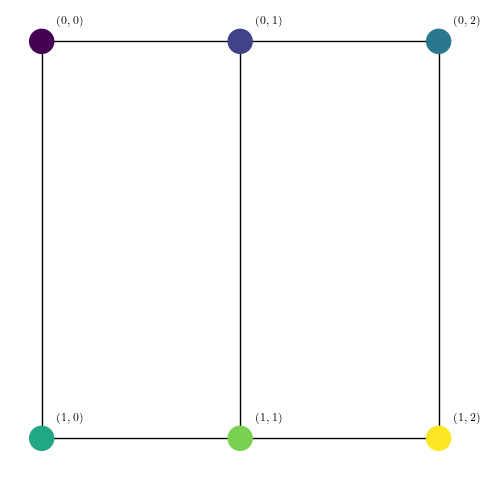

In [5]:
%matplotlib widget
mesh = Tensor((2,3))
draw2DMesh(mesh)

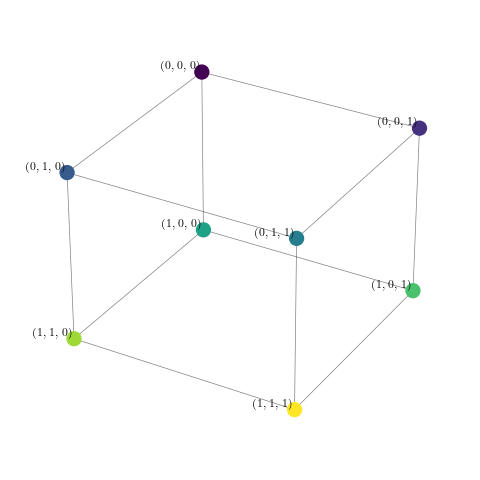

In [6]:
%matplotlib widget
mesh = Tensor((2,2,2))
draw3DMesh(mesh)

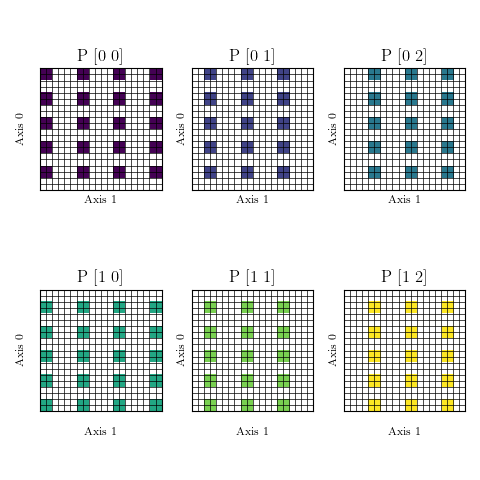

In [7]:
%matplotlib widget

tensor = Tensor((20, 20))
mesh = Tensor((2, 3))
d = PMeshDist(mesh, ((0,), (1,)), (2, 2))
draw2DProcessorView(tensor, d)

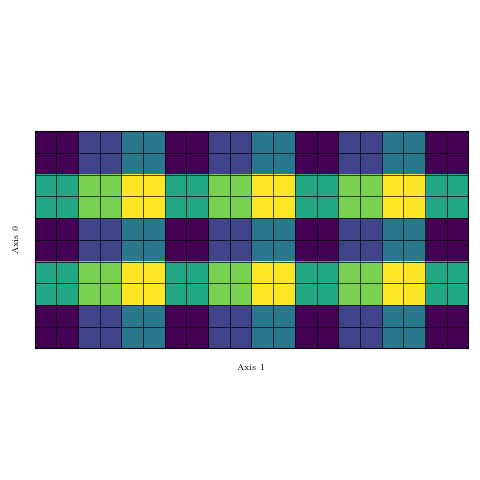

/home/juanpedroghm/.local/share/pdm/venvs/tensorcraft-BDKqNiT5-tensorcraft3.10-dev/lib/python3.10/site-packages/ipympl/backend_nbagg.py:279: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.manager.handle_json(content)


In [ ]:
%matplotlib widget
tensor = Tensor((10, 20))
d = PMeshDist(mesh, ((0,), (1,)), (2, 2))
draw2DTensor(tensor, d)

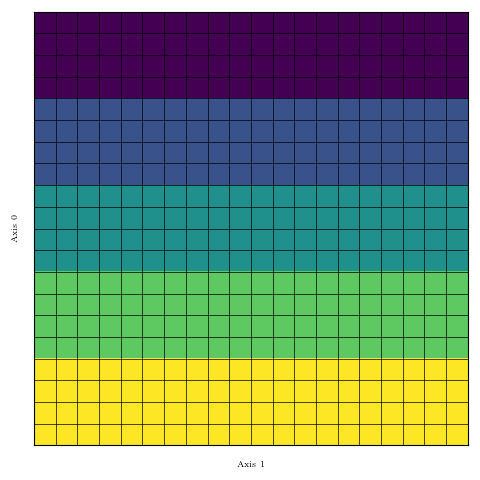

In [ ]:
%matplotlib widget

tensor = Tensor((20, 20))
d = BlockDist(5, 0)
draw2DTensor(tensor, d)

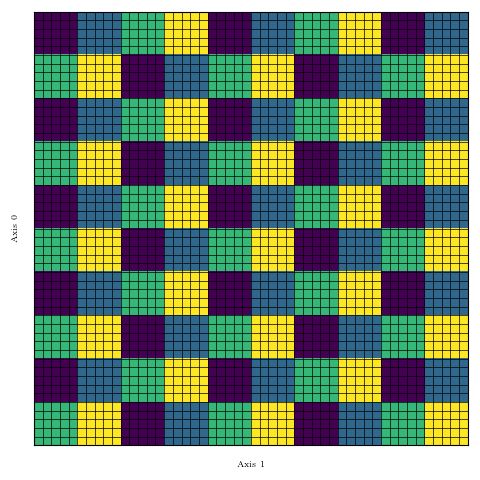

In [ ]:
%matplotlib widget

tensor = Tensor((50, 50))
d = TileDist(4, 5)
draw2DTensor(tensor, d)

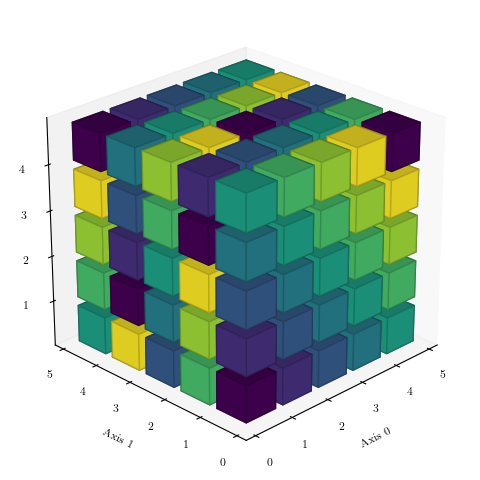

In [9]:
%matplotlib widget
tensor = Tensor((5, 5, 5))
dist = TileDist(8, 1)
# dist = BlockDist(5, 0)
draw3DTensor(tensor, dist)

In [10]:
import networkx as nx
mesh = Tensor((4,3))
graph = nx.grid_2d_graph(*mesh.shape)
graph

In [ ]:
pos = nx.spring_layout(graph)
pos

{(0, 0): array([-0.99681034, -0.00639449]),
 (0, 1): array([-0.73887793, -0.42941851]),
 (0, 2): array([-0.44855615, -0.83235181]),
 (1, 0): array([-0.54870645,  0.28409596]),
 (1, 1): array([-0.26852101, -0.15112476]),
 (1, 2): array([ 0.02361915, -0.57852089]),
 (2, 0): array([-0.02551461,  0.58231913]),
 (2, 1): array([0.26650629, 0.15340376]),
 (2, 2): array([ 0.54766702, -0.27918797]),
 (3, 0): array([0.4478285, 0.8243575]),
 (3, 1): array([0.74136553, 0.42630239]),
 (3, 2): array([1.        , 0.00651969])}